In [3]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

<div id="3.1"></div>

## Distribuciones
<img src="https://docs.scipy.org/doc/scipy/reference/_static/img/scipy_org_logo.png" width="40%"></img>

[SciPy](https://docs.scipy.org/doc/scipy/reference/index.html)
**scipy.stats (Scientific Python Statistics)**, Scipy es un módulo para matemáticas, ciencia e ingeniería, su submódulo stats nos proporciona herramientas parael uso de distribuciones y variables aleatorias (**random variables**) incluye soporte para el uso de **arrays n dimensionales (ndarray)**.

Para poder utilizarlo debemos agregar la siguiente linea a nuestro código:

In [4]:
from scipy import stats

A continuación se revisarán los comandos básicos que se utilizarán durante esta actividad, para mayor información del módulo se recomienda revisar la [documentación](https://docs.scipy.org/doc/scipy/reference/stats.html) del submódulo.


<div id="3.1.1"></div>

### Distribuciones Paramétricas

El módulo cuenta con dos tipos de distribuciones paramétricas: **continuas** y **discretas**, las cuales se encuentran encapsuladas en las clases abstractas ``rv_continuous`` y ``rv_discrete`` de las cuales heredas las distribuciones.

Una lista completa con las distribuciones continuas disponibles en el submódulo se encuentran en este [link](https://docs.scipy.org/doc/scipy/reference/stats.html#continuous-distributions). Ejemplos de estas son:

* Normal($\mu=5$, $\sigma=2$): ``stats.norm(loc=5, scale=2)``

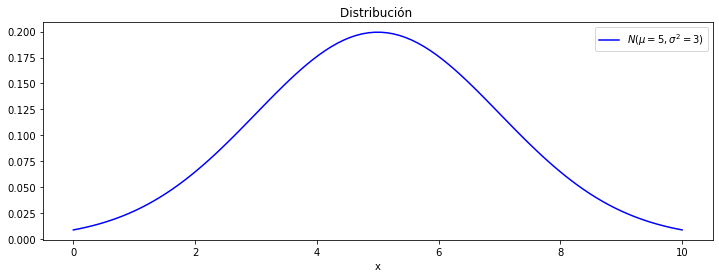

In [32]:
# Instanciar Distribucion
N = stats.norm(loc=5, scale=2)

# Generar figura
plt.figure(figsize=(12,4))

# Generar puntos
x = np.linspace(0,10, 100)

# Generar probabilidades para Normal 
plt.plot(x, N.pdf(x), "b", label="$N(\\mu=5, \\sigma^2=3)$")

# Agregar estilo
plt.title("Distribución ")
plt.xlabel("x")
plt.legend()
plt.show()


* Gamma($\alpha=9$, $\beta=2$): ``stats.gamma(a=9, scale=(1/2))``

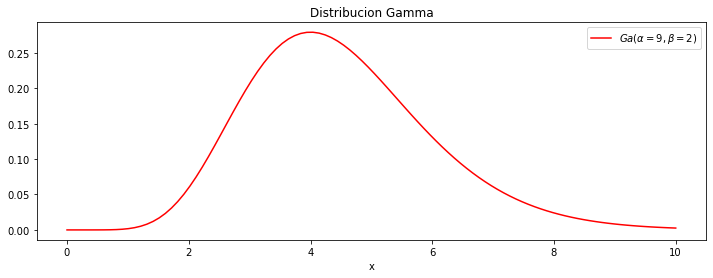

In [31]:
# Instanciar Distribucion
Ga = stats.gamma(a=9, scale=0.5)

# Generar figura
plt.figure(figsize=(12,4))

# Generar puntos
x = np.linspace(0,10, 100)

# Generar probabilidades para  Gamma
plt.plot(x, Ga.pdf(x),"r", label="$Ga(\\alpha=9, \\beta=2)$")

# Agregar estilo
plt.title("Distribucion Gamma")
plt.xlabel("x")
plt.legend()

Una lista completa con las distribuciones discretas disponibles en el submódulo se encuentran en este [link](https://docs.scipy.org/doc/scipy/reference/stats.html#discrete-distributions). Ejemplos de estas son:

Las binomial, para predicir la variable lanzaR 5 veces una moneda

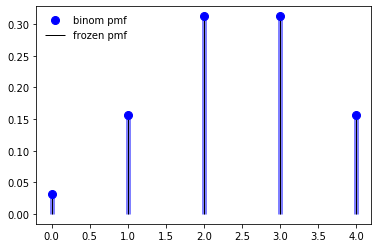

In [12]:
from scipy.stats import binom
n, p = 5, 0.5
fig, ax = plt.subplots(1, 1)
x = np.arange(binom.ppf(0.01, n, p),
              binom.ppf(0.99, n, p))
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
rv = binom(n, p)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,
        label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()

La distribución binomial tiende a una distribución de Poisson cuando en una distribución binomial se realiza el experimento muchas veces, la muestra n es grande y la probabilidad de éxito p en cada ensayo es baja, es aquí donde aplica el modelo de distribución de Poisson. Se tiene que cumplir que: p < 0.10 p * n < 10


La probabilidad de que haya un accidente en una compañía de manufactura es de 0.02 por cada día de trabajo. Si se trabajan 300 días al año, ¿cuál es la probabilidad de tener 3 accidentes? Como la probabilidad p es menor que 0.1, y el producto n * p es menor que 10 (300 * 0.02 = 6), entonces, aplicamos el modelo de distribución de Poisson:

* Poisson($\lambda=6$): ``stats.poisson(mu=6)``


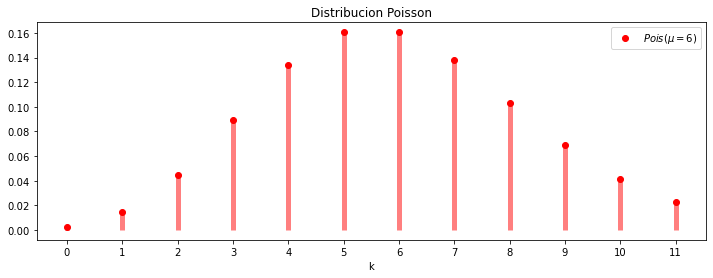

In [29]:

# Instanciar Distribuciones
Pois = stats.poisson(mu=6)

# Generar figura
plt.figure(figsize=(12,4))

# Generar puntos 
k = np.arange(12)


# Generar probabilidades para Poisson
plt.plot(k, Pois.pmf(k), "ro", label="$Pois(\\mu=6)$")
plt.vlines(k, 0, Pois.pmf(k), colors='r', lw=5, alpha=0.5)

# Agregar estilo
plt.title("Distribucion Poisson")
plt.xlabel("k")
plt.xticks(k)
plt.legend()
plt.show();

<div id="3.1.1"></div>

### Distribuciones No Paramétricas

El módulo cuenta además otro tipo de distribuciones **no paramétricas**, la cual genera una distribución a partir de una muestra empirica, a partir de datos en forma de **histograma**. Esta se encuentra en la clase ``rv_histogram``, la cual hereda de la clas ``rv_continuous``. La documentacion de esta clase se encuentra en este [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_histogram.html#scipy.stats.rv_histogram).

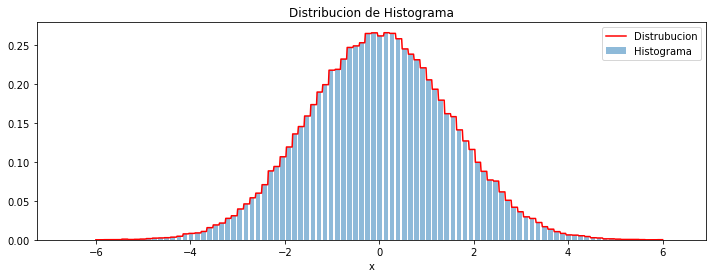

In [30]:
# Generar datos
data = stats.norm.rvs(size=100000, loc=0, scale=1.5, random_state=123)

# Generar histogramas
bins = 100
hist = np.histogram(data, bins=bins)

# Generar distribucion
hist_dist = stats.rv_histogram(hist)

# Generar figura
plt.figure(figsize=(12,4))

# Graficar histograma
plt.hist(data, density=True, bins=bins, alpha=0.5,label="Histograma", width=0.1);

# Generar probabilidades
x = np.linspace(-6, 6, 1000)
plt.plot(x, hist_dist.pdf(x), "r-", label="Distrubucion")

# Agregar estilo
plt.legend()
plt.title("Distribucion de Histograma")
plt.xlabel("x")
plt.show();

<div id="3.2"></div>

### Variables Aleatorias

Al instanciar las distribuciones, en realidad estaremos instanciado una clase del tipo ``rv_froze``, la cual representa a una **Variable Aleatoria (Random Variable)**.

In [22]:
type(N)

scipy.stats._distn_infrastructure.rv_frozen

Podemos utilizar esta clase para generar **muestras aleatorias** que se sigan una cierta regla. Por ejemplo:

$X_1,..., X_n$ son una muestra aleatoria, tal que $X_i$ ~ $N(5,2)$

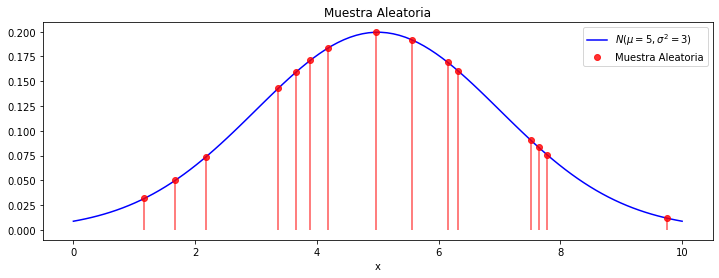

In [23]:
# Tamaño de muestra
n = 15

# Generar Muestra a partir de la distribucion N(5,2)
X_n = N.rvs(size=n)

# Generar figura
plt.figure(figsize=(12,4))

# Generar puntos
x = np.linspace(0,10, 100)

# Generar probabilidades para Normal y Gamma
plt.plot(x, N.pdf(x), "b", label="$N(\\mu=5, \\sigma^2=3)$")
plt.plot(X_n, N.pdf(X_n), "ro", label="Muestra Aleatoria", alpha=0.8)
plt.vlines(X_n, 0, N.pdf(X_n), colors='r', lw=2, alpha=0.5)

# Agregar estilo
plt.title("Muestra Aleatoria")
plt.xlabel("x")
plt.legend()
plt.show()